# 데이터 불러오기 + Resize 하기

In [ ]:
# 이미지 데이터 합하기  img_rename.sh
'''
#!/bin/bash

# rock 디렉토리의 마지막 이미지 파일명을 찾습니다.
last_num=$(ls ./rock/*.jpg 2>/dev/null | sed 's/[^0-9]*//' | sort -n | tail -n 1)

# 마지막 숫자 뒤에 1을 추가하여 시작 번호를 정의합니다.
if [ -z "$last_num" ]; then
    next_num=1
else
    next_num=$((last_num + 1))
fi

# from_rock 디렉토리의 이미지 파일들을 순회합니다.
for img in /aiffel/aiffel/from/rock/*.jpg; do
    if [ -e "$img" ]; then
        # 파일명을 new_name으로 지정하고 넘버링합니다.
        new_name=$(printf "rock/%d.jpg" "$next_num")
        
        # 파일을 커맨드로 복사합니다.
        cp "$img" "$new_name"
        
        # 다음 번호로 증가
        next_num=$((next_num + 1))
    fi
done



# paper 디렉토리의 마지막 이미지 파일명을 찾습니다.
last_num=$(ls ./paper/*.jpg 2>/dev/null | sed 's/[^0-9]*//' | sort -n | tail -n 1)

# 마지막 숫자 뒤에 1을 추가하여 시작 번호를 정의합니다.
if [ -z "$last_num" ]; then
    next_num=1
else
    next_num=$((last_num + 1))
fi

# from_paper 디렉토리의 이미지 파일들을 순회합니다.
for img in /aiffel/aiffel/from/paper/*.jpg; do
    if [ -e "$img" ]; then
        # 파일명을 new_name으로 지정하고 넘버링합니다.
        new_name=$(printf "paper/%d.jpg" "$next_num")
        
        # 파일을 커맨드로 복사합니다.
        cp "$img" "$new_name"
        
        # 다음 번호로 증가
        next_num=$((next_num + 1))
    fi
done



# scissor 디렉토리의 마지막 이미지 파일명을 찾습니다.
last_num=$(ls ./scissor/*.jpg 2>/dev/null | sed 's/[^0-9]*//' | sort -n | tail -n 1)

# 마지막 숫자 뒤에 1을 추가하여 시작 번호를 정의합니다.
if [ -z "$last_num" ]; then
    next_num=1
else
    next_num=$((last_num + 1))
fi

# from_scissor 디렉토리의 이미지 파일들을 순회합니다.
for img in /aiffel/aiffel/from/scissor/*.jpg; do
    if [ -e "$img" ]; then
        # 파일명을 new_name으로 지정하고 넘버링합니다.
        new_name=$(printf "scissor/%d.jpg" "$next_num")
        
        # 파일을 커맨드로 복사합니다.
        cp "$img" "$new_name"
        
        # 다음 번호로 증가
        next_num=$((next_num + 1))
    fi
done
'''

In [5]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [6]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
# end of def resize_images

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

310  images to be resized.
310  images resized.
가위 이미지 resize 완료!


In [7]:
# 보자기 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")

300  images to be resized.
300  images resized.
보자기 이미지 resize 완료!


In [8]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("주먹 이미지 resize 완료!")

211  images to be resized.
211  images resized.
주먹 이미지 resize 완료!


In [34]:
## 데이터 로드 함수 만들기
import numpy as np
from sklearn.model_selection import train_test_split


def load_data(img_path, number_of_data=821):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
x_train, y_train = load_data(image_dir_path)


# x_train, y_train, x_test, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

x_train_norm = x_train / 255.0


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 821 입니다.
x_train shape: (821, 28, 28, 3)
y_train shape: (821,)


라벨:  0


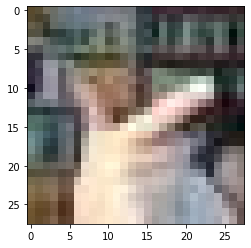

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [80]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=64
n_channel_2=128
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_29 (Dense)             

# 딥러닝 네트워크 학습시키기

In [81]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)


Epoch 1/20
26/26 [==============================] - 3s 98ms/step - loss: 19.9607 - accuracy: 0.3983
Epoch 2/20
26/26 [==============================] - 3s 100ms/step - loss: 0.7254 - accuracy: 0.6370
Epoch 3/20
26/26 [==============================] - 2s 95ms/step - loss: 0.5387 - accuracy: 0.7661
Epoch 4/20
26/26 [==============================] - 3s 99ms/step - loss: 0.4032 - accuracy: 0.8429
Epoch 5/20
26/26 [==============================] - 3s 99ms/step - loss: 0.3172 - accuracy: 0.8599
Epoch 6/20
26/26 [==============================] - 3s 100ms/step - loss: 0.2861 - accuracy: 0.8965
Epoch 7/20
26/26 [==============================] - 3s 98ms/step - loss: 0.1665 - accuracy: 0.9415
Epoch 8/20
26/26 [==============================] - 3s 99ms/step - loss: 0.1132 - accuracy: 0.9695
Epoch 9/20
26/26 [==============================] - 3s 101ms/step - loss: 0.0856 - accuracy: 0.9805
Epoch 10/20
26/26 [==============================] - 3s 97ms/step - loss: 0.0618 - accuracy: 0.9878
Epoch

# 얼마나 잘 만들었는지 확인하기(테스트)

테스트용 데이터인 x_test, y_test를 만들어 봅시다. 노승호 그루의 가위바위보 이미지 사용

In [51]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


# 보자기 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("주먹 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보자기 이미지 resize 완료!
100  images to be resized.
100  images resized.
주먹 이미지 resize 완료!


In [82]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
## 데이터 로드 함수 만들기
import numpy as np


def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
x_test, y_test = load_test_data(image_dir_path)


x_test_norm = x_test / 255.0


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


accuracy 측정

In [83]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.1717 - accuracy: 0.5367
test_loss: 4.171741008758545 
test_accuracy: 0.5366666913032532


In [79]:
# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=30

# 10/10 - 0s - loss: 17.4148 - accuracy: 0.2267
# test_loss: 17.414796829223633 
# test_accuracy: 0.2266666740179062





# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=20

# 10/10 - 0s - loss: 16.3186 - accuracy: 0.3333
# test_loss: 16.318634033203125 
# test_accuracy: 0.3333333432674408





# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=15

# 10/10 - 0s - loss: 6.4249 - accuracy: 0.3800
# test_loss: 6.424914360046387 
# test_accuracy: 0.3799999952316284





# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=10

# 10/10 - 0s - loss: 8.9843 - accuracy: 0.2633
# test_loss: 8.984334945678711 
# test_accuracy: 0.2633333206176758





# n_channel_1=16
# n_channel_2=32
# n_dense=32
# n_train_epoch=10

# 10/10 - 0s - loss: 9.0721 - accuracy: 0.2633
# test_loss: 9.072083473205566 
# test_accuracy: 0.2633333206176758

#### 다시 함
# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=20

# 10/10 - 0s - loss: 4.3652 - accuracy: 0.5300
# test_loss: 4.365242004394531 
# test_accuracy: 0.5299999713897705



# n_channel_1=64
# n_channel_2=128
# n_dense=128
# n_train_epoch=20


# 10/10 - 0s - loss: 4.1717 - accuracy: 0.5367
# test_loss: 4.171741008758545 
# test_accuracy: 0.5366666913032532

n_channel_1=64

n_channel_2=128

n_dense=128

n_train_epoch=20

---------------------------------
위 파라미터일때 가장 좋은 결과 

10/10 - 0s - loss: 4.1717 - accuracy: 0.5367

test_loss: 4.171741008758545 

test_accuracy: 0.5366666913032532
